<a href="https://colab.research.google.com/github/damarisuwu1/fund_alg_b/blob/master/Prediction__Oriente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BUS STOP ANALYSIS: MÉRIDA-HUNUCMÁ (ORIENTE)

### CRISP-DM Methodology

####Data Mining, Universidad Politécnica de Yucatán

Student: Damaris Yuselin Dzul Uc

Professor: Victor Alejandro Ortíz Santiago

# 1. Business Understanding

## Objectives:
Predicting bus arrival times at different
stops in Mérida to Hunucmá. This
prediction can help improve the efficiency
of public transportation and the user
experience.

## Business context:
Public transport service in Merida to Hunucma is a critical component of urban mobility infrastructure. Accurate forecasting of bus arrival times is essential for urban planning, customer satisfaction and operational efficiency.

## Project plan:
1. Exploratory Data Analysis
2. Data Visualisation
3. Data Preparation for Modelling
4. Predictive Modelling
4. Evaluation

# 2. Data Understanding

## Data collection:
the primary focus was on gathering and understanding the data necessary for predicting bus arrival times. The dataset was self-compiled due to the lack of comprehensive public data. Initial data included the bus schedules with departure times, the routes taken (direct or via specific locations), and the operational days of the week.

In [5]:
import pandas as pd

# Cargar el archivo CSV
df= pd.read_csv('/content/oriente.csv', encoding='ISO-8859-1')

# Cambiar la distancia y tiempo en filas donde la columna 'Via' es 'Directa'
df.loc[df['Via'] == 'Directa', 'Distancia'] = 30
df.loc[df['Via'] == 'Directa', 'tiempo'] = 50

# Verificar algunos de los cambios realizados
print(df[df['Via'] == 'Directa'].head())

# Guardar los cambios en el archivo CSV
ruta_archivo_modificado = '/content/oriente.csv'  # Define la ruta para el archivo modificado
df.to_csv(ruta_archivo_modificado, index=False)


   Hora Salida Casa (Paradero Oriente hunucma)   C-65x68 sala de juicios  \
2      6:20:00                         6:21:00   6:25:00         6:29:00   
15    16:00:00                        16:00:00  16:05:00        16:08:00   
17    17:00:00                        16:59:00  17:04:00        17:06:00   
21    19:15:00                        19:13:00  19:16:00        19:16:00   
24    21:00:00                        21:01:00  21:02:00        21:04:00   

     C-65x80       zoo     Horan Av Jacinto Canek 591, Centro  \
2    6:29:00   6:35:00   6:39:00                      6:41:00   
15  16:10:00  16:16:00  16:21:00                     16:20:00   
17  17:09:00  17:15:00  17:20:00                     17:19:00   
21  19:16:00  19:19:00  19:22:00                     19:22:00   
24  21:03:00  21:07:00  21:12:00                     21:14:00   

   Tribunal Superior De Justicia Del Estado De Yucatan Hogar Interceramic  \
2                                             6:41:00             6:43:00  

##Exploratory Data Analysis

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load Dataset

In [7]:
# Ruta al archivo CSV
df= pd.read_csv('/content/oriente.csv', encoding='ISO-8859-1')
df

,Hora Salida,Casa (Paradero Oriente hunucma),C-65x68,sala de juicios,C-65x80,zoo,Horan,"Av Jacinto Canek 591, Centro",Tribunal Superior De Justicia Del Estado De Yucatan,Hogar Interceramic,...,Velocidad_vehiculos_km_h,Topes,Fecha,Dia_Semana,Es_Fin_De_Semana,Es_Dia_Festivo,Via,Distancia,tiempo,paradas
0,5:00:00,4:58:00,4:59:00,5:00:00,5:02:00,5:06:00,5:12:00,5:14:00,5:15:00,5:16:00,...,40-50,12,1/1/2023,"Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,D...",True,True,Ucu,33.8,65,"Terminal oriente, Calle 67 479, Centro, 97000 ..."
1,6:00:00,6:01:00,6:04:00,6:04:00,6:05:00,6:11:00,6:17:00,6:19:00,6:22:00,6:21:00,...,40-50,12,1/1/2023,"Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,D...",True,True,Ucu,33.8,65,"Sala de Juicios Orales 91, Parque Santiago, Ce..."
2,6:20:00,6:21:00,6:25:00,6:29:00,6:29:00,6:35:00,6:39:00,6:41:00,6:41:00,6:43:00,...,40-50,12,1/1/2023,"Lunes,Martes,Miercoles,Jueves,Viernes,Sabado",True,True,Directa,30.0,50,"C-65 x 80 Col. Centro 91, Parque Santiago, Cen..."
3,7:00:00,7:02:00,7:05:00,7:05:00,7:08:00,7:12:00,7:15:00,7:16:00,7:19:00,7:18:00,...,40-50,12,1/1/2023,"Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,D...",True,True,Ucu,33.8,65,"ZoolÃ³gico El Centenario 91, Parque Santiago, ..."
4,8:00:00,8:00:00,8:05:00,8:09:00,8:09:00,8:13:00,8:18:00,8:19:00,8:20:00,8:21:00,...,40-50,12,1/1/2023,"Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,D...",True,True,Ucu,33.8,65,"Hospital General Agustin OÂ´Horan 91, Centro, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,18:45:00,18:47:00,18:49:00,18:53:00,18:53:00,18:57:00,19:00:00,19:00:00,19:00:00,19:00:00,...,40-50,12,12/31/2023,"Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,D...",True,False,Ucu,33.8,65,NaN
9121,19:15:00,19:13:00,19:16:00,19:16:00,19:16:00,19:19:00,19:22:00,19:22:00,19:25:00,19:27:00,...,40-50,12,12/31/2023,"Lunes,Martes,Miercoles,Jueves,Viernes,Domingo",True,False,Directa,30.0,50,NaN
9122,20:00:00,20:01:00,20:04:00,20:08:00,20:09:00,20:11:00,20:13:00,20:16:00,20:18:00,20:19:00,...,40-50,12,12/31/2023,"Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,D...",True,False,Ucu,33.8,65,NaN
9123,20:30:00,20:30:00,20:34:00,20:37:00,20:38:00,20:42:00,20:44:00,20:44:00,20:46:00,20:47:00,...,40-50,12,12/31/2023,"Lunes,Martes,Miercoles,Jueves,Viernes,Domingo",True,False,Ucu,33.8,65,NaN


In [8]:
df.columns

Index(['Hora Salida', 'Casa (Paradero Oriente hunucma)', 'C-65x68',
       'sala de juicios', 'C-65x80', 'zoo', 'Horan',
       'Av Jacinto Canek 591, Centro',
       'Tribunal Superior De Justicia Del Estado De Yucatan',
       'Hogar Interceramic', 'Centro De Servicio Lth', 'Atlantida real',
       'Iberia Corrugados', 'Soriana Hiper Canek', 'Taqueria Calvillo',
       'REFACCIONES AUTOMOTRICES CANEK',
       'SUBESTACION PONIENTE DE ELECTRICIDAD', 'El Corralon',
       'Parada Walmart Caucel', 'La Gas - Caucel', 'AutoZone Refacciones',
       'Merida - Caucel, 407', 'Plaza Gran Santa Fe 91', 'Ucu',
       'Hora Llegada(Hunucma)', 'Semaforos', 'Cruces_con_mas_trafico',
       'Velocidad_vehiculos_km_h', 'Topes', 'Fecha', 'Dia_Semana',
       'Es_Fin_De_Semana', 'Es_Dia_Festivo', 'Via', 'Distancia', 'tiempo',
       'paradas'],
      dtype='object')

Initial Data Review

In [9]:
# Ver las primeras filas
print(df.head())

# Ver las últimas filas
print(df.tail())

  Hora Salida Casa (Paradero Oriente hunucma)  C-65x68 sala de juicios  \
0     5:00:00                         4:58:00  4:59:00         5:00:00   
1     6:00:00                         6:01:00  6:04:00         6:04:00   
2     6:20:00                         6:21:00  6:25:00         6:29:00   
3     7:00:00                         7:02:00  7:05:00         7:05:00   
4     8:00:00                         8:00:00  8:05:00         8:09:00   

   C-65x80      zoo    Horan Av Jacinto Canek 591, Centro  \
0  5:02:00  5:06:00  5:12:00                      5:14:00   
1  6:05:00  6:11:00  6:17:00                      6:19:00   
2  6:29:00  6:35:00  6:39:00                      6:41:00   
3  7:08:00  7:12:00  7:15:00                      7:16:00   
4  8:09:00  8:13:00  8:18:00                      8:19:00   

  Tribunal Superior De Justicia Del Estado De Yucatan Hogar Interceramic  ...  \
0                                            5:15:00             5:16:00  ...   
1                         

Statistical Summary and Structure of the Data

In [10]:
# Resumen estadístico
print(df.describe())

# Información de la estructura
print(df.info())


       Semaforos   Topes    Distancia       tiempo
count     9125.0  9125.0  9125.000000  9125.000000
mean        25.0    12.0    33.040000    62.000000
std          0.0     0.0     1.520083     6.000329
min         25.0    12.0    30.000000    50.000000
25%         25.0    12.0    33.800000    65.000000
50%         25.0    12.0    33.800000    65.000000
75%         25.0    12.0    33.800000    65.000000
max         25.0    12.0    33.800000    65.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 37 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Hora Salida                                          9125 non-null   object 
 1   Casa (Paradero Oriente hunucma)                      9125 non-null   object 
 2   C-65x68                                              9125 non-null   object 
 3   sala de juicios    

Verification of Missing Values

In [11]:
# Verificar valores faltantes
print(df.isnull().sum())


Hora Salida                                               0
Casa (Paradero Oriente hunucma)                           0
C-65x68                                                   0
sala de juicios                                           0
C-65x80                                                   0
zoo                                                       0
Horan                                                     0
Av Jacinto Canek 591, Centro                              0
Tribunal Superior De Justicia Del Estado De Yucatan       0
Hogar Interceramic                                        0
Centro De Servicio Lth                                    0
Atlantida real                                            0
Iberia Corrugados                                         0
Soriana Hiper Canek                                       0
Taqueria Calvillo                                         0
REFACCIONES AUTOMOTRICES CANEK                            0
SUBESTACION PONIENTE DE ELECTRICIDAD    

*Cada barra en el histograma representa un rango de tiempo, y la altura de la barra indica cuántas veces se registran tiempos dentro de ese rango.

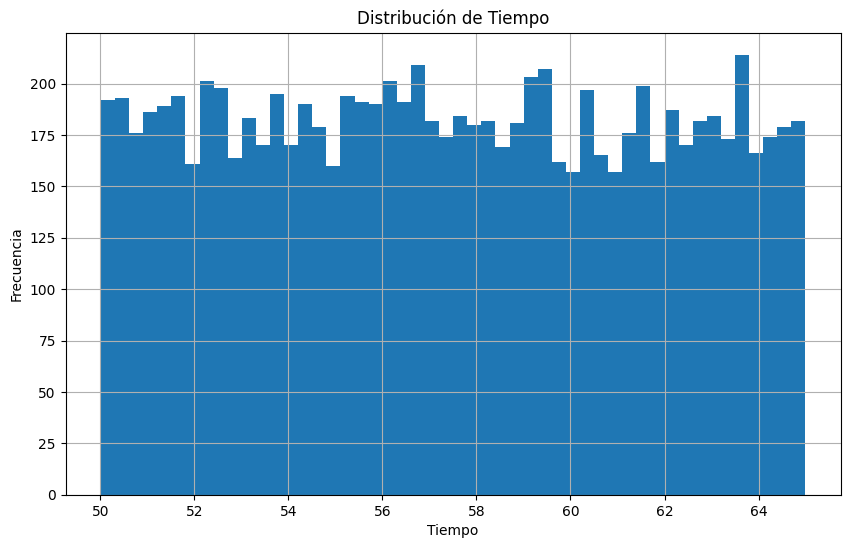

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv('/content/oriente.csv')  # Reemplaza con la ruta de tu archivo

# Convertir la columna 'tiempo' a numérica si no lo es
df['tiempo'] = pd.to_numeric(df['tiempo'], errors='coerce')

# Asegúrate de que 'Dia_Semana' sea una columna categórica
df['Dia_Semana'] = df['Dia_Semana'].astype('category')

# Histograma de la variable 'tiempo'
plt.figure(figsize=(10, 6))
df['tiempo'].hist(bins=50)
plt.title('Distribución de Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.show()



# 3. Data Preparation

##Visualización de Datos

Gráfico de Barras de Frecuencia de Autobuses por Hora del Día:  Este gráfico mouestra cuántos autobuses pasan por una parada o cuántos viajes se realizan en cada hora del día.

In [14]:
# Revisar los tipos de datos
print(df.dtypes)


Hora Salida                                              object
Casa (Paradero Oriente hunucma)                          object
C-65x68                                                  object
sala de juicios                                          object
C-65x80                                                  object
zoo                                                      object
Horan                                                    object
Av Jacinto Canek 591, Centro                             object
Tribunal Superior De Justicia Del Estado De Yucatan      object
Hogar Interceramic                                       object
Centro De Servicio Lth                                   object
Atlantida real                                           object
Iberia Corrugados                                        object
Soriana Hiper Canek                                      object
Taqueria Calvillo                                        object
REFACCIONES AUTOMOTRICES CANEK          

##Create graphs of bus frequencies at different times of the day. Throughout the year

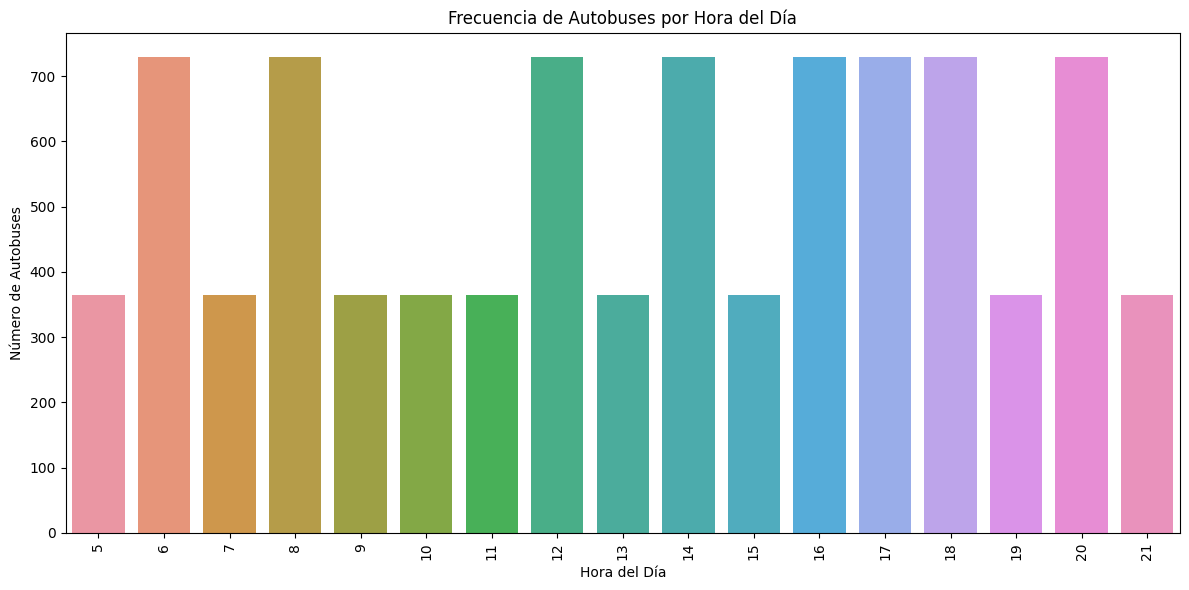

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el archivo CSV
df = pd.read_csv('/content/oriente.csv')

# Asegúrate de convertir la columna de horas a tipo datetime o extraer la hora si es necesario
df['Hora Salida'] = pd.to_datetime(df['Hora Salida']).dt.hour

# Crea un gráfico de barras de la frecuencia de autobuses por hora
plt.figure(figsize=(12, 6))
sns.countplot(x='Hora Salida', data=df)
plt.title('Frecuencia de Autobuses por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Autobuses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#View the duration of journeys throughout the day or week.

<ipython-input-17-1f088873856e>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hora', y='tiempo', data=df, ci=None, estimator='mean')


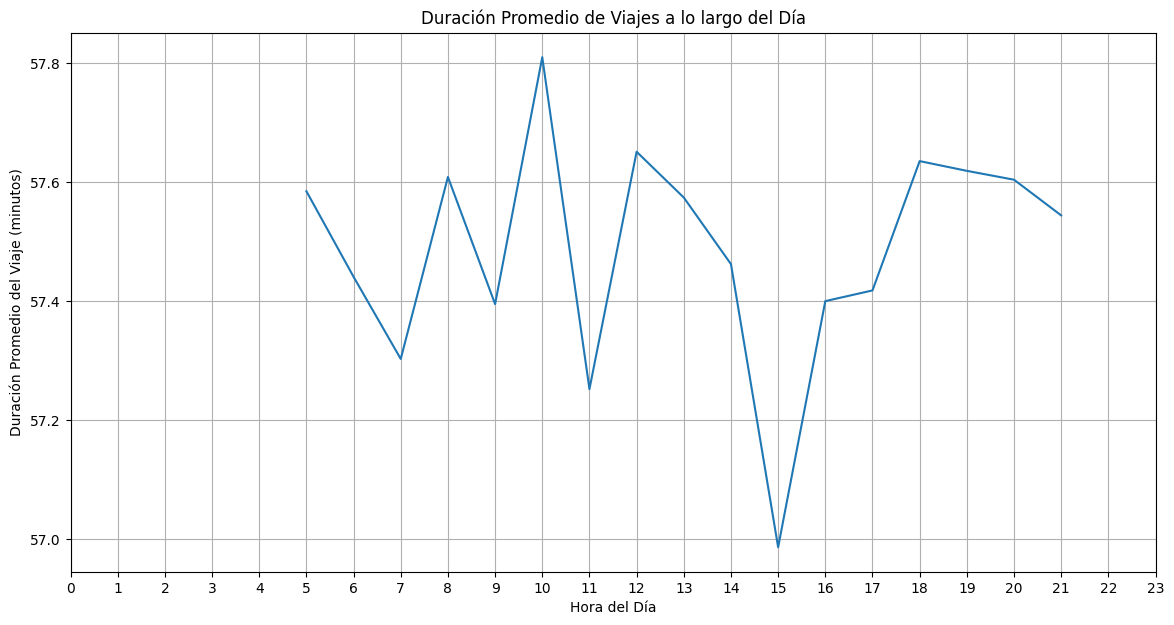

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
df = pd.read_csv('/content/oriente.csv')

# Asegurarse de que la columna 'tiempo' sea numérica
df['tiempo'] = pd.to_numeric(df['tiempo'], errors='coerce')

# Convertir la columna de hora de salida a formato datetime y extraer la hora
df['Hora'] = pd.to_datetime(df['Hora Salida'], format='%H:%M:%S').dt.hour

# Crear un gráfico de líneas para visualizar la duración promedio de los viajes a lo largo del día
plt.figure(figsize=(14, 7))
sns.lineplot(x='Hora', y='tiempo', data=df, ci=None, estimator='mean')
plt.title('Duración Promedio de Viajes a lo largo del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Duración Promedio del Viaje (minutos)')
plt.xticks(range(24))  # Asumiendo formato de 24 horas
plt.grid(True)
plt.show()


In [18]:
df.columns

Index(['Hora Salida', 'Casa (Paradero Oriente hunucma)', 'C-65x68',
       'sala de juicios', 'C-65x80', 'zoo', 'Horan',
       'Av Jacinto Canek 591, Centro',
       'Tribunal Superior De Justicia Del Estado De Yucatan',
       'Hogar Interceramic', 'Centro De Servicio Lth', 'Atlantida real',
       'Iberia Corrugados', 'Soriana Hiper Canek', 'Taqueria Calvillo',
       'REFACCIONES AUTOMOTRICES CANEK',
       'SUBESTACION PONIENTE DE ELECTRICIDAD', 'El Corralon',
       'Parada Walmart Caucel', 'La Gas - Caucel', 'AutoZone Refacciones',
       'Merida - Caucel, 407', 'Plaza Gran Santa Fe 91', 'Ucu',
       'Hora Llegada(Hunucma)', 'Semaforos', 'Cruces_con_mas_trafico',
       'Velocidad_vehiculos_km_h', 'Topes', 'Fecha', 'Dia_Semana',
       'Es_Fin_De_Semana', 'Es_Dia_Festivo', 'Via', 'Distancia', 'tiempo',
       'paradas', 'Hora'],
      dtype='object')

Este código ahora calculará los retrasos para todas las horas del día, permitiéndote visualizar los retrasos en cada paradero sin la restricción de horas pico.

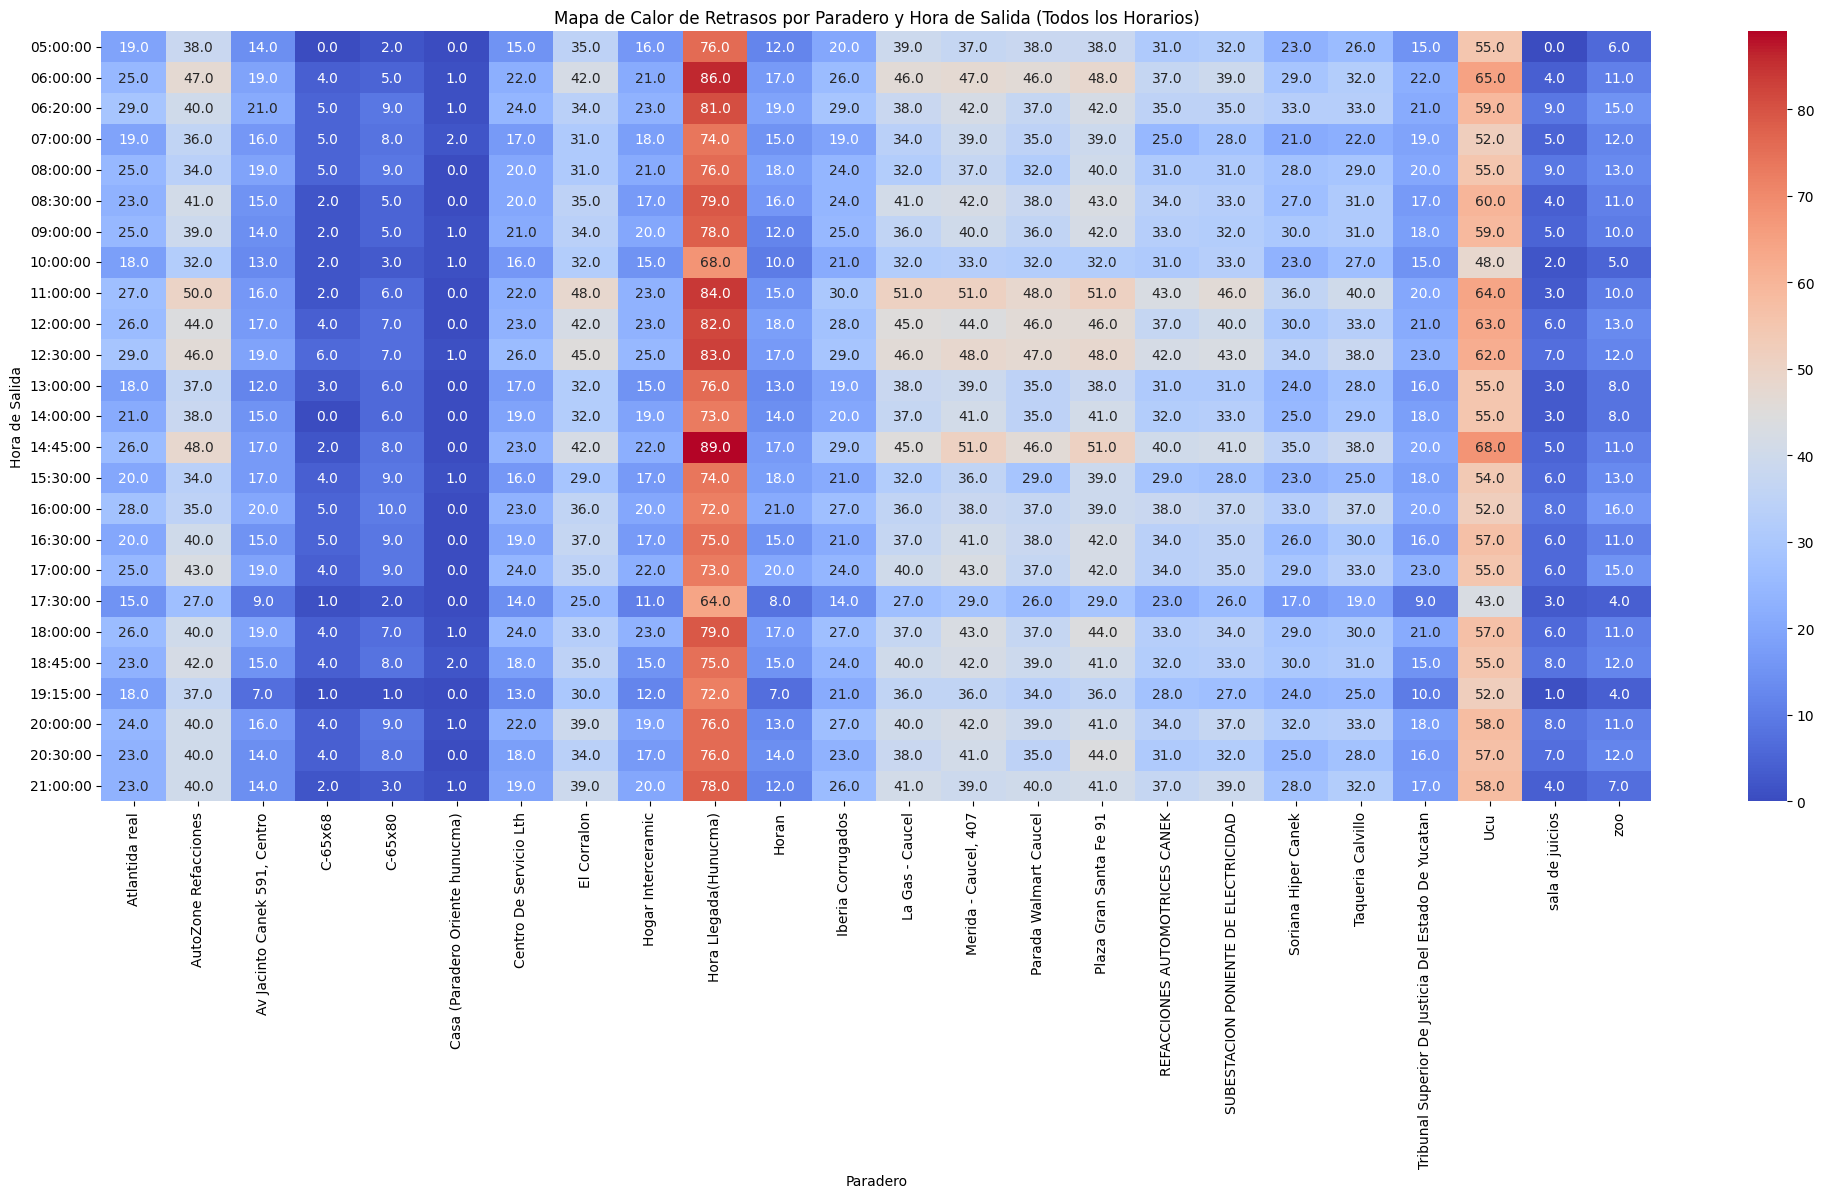

In [41]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = '/content/oriente.csv'
data = pd.read_csv(file_path)

# Convertir las columnas de tiempo a formato datetime
for col in data.columns:
    if 'Hora' in col or 'Paradero' in col:
        data[col] = pd.to_datetime(data[col], format='%H:%M:%S').dt.time

# Lista de paraderos
paraderos = [
    'Hora Salida', 'Casa (Paradero Oriente hunucma)', 'C-65x68',
    'sala de juicios', 'C-65x80', 'zoo', 'Horan',
    'Av Jacinto Canek 591, Centro',
    'Tribunal Superior De Justicia Del Estado De Yucatan',
    'Hogar Interceramic', 'Centro De Servicio Lth', 'Atlantida real',
    'Iberia Corrugados', 'Soriana Hiper Canek', 'Taqueria Calvillo',
    'REFACCIONES AUTOMOTRICES CANEK',
    'SUBESTACION PONIENTE DE ELECTRICIDAD', 'El Corralon',
    'Parada Walmart Caucel', 'La Gas - Caucel', 'AutoZone Refacciones',
    'Merida - Caucel, 407', 'Plaza Gran Santa Fe 91', 'Ucu',
    'Hora Llegada(Hunucma)'
]

# Corregir el formato de hora para todas las columnas relevantes
for col in paraderos:
    if col != 'Hora Salida' and col in data.columns:
        data[col] = pd.to_datetime(data[col].dropna(), format='%H:%M:%S').dt.time

# Función para calcular los retrasos sin considerar horas pico
def calculate_delay_all_hours(row):
    delays = {}
    salida = dt.datetime.combine(dt.date.today(), row['Hora Salida'])

    for stop in paraderos:
        if stop in row and pd.notnull(row[stop]):
            stop_time = dt.datetime.combine(dt.date.today(), row[stop])
            delay = max((stop_time - salida).total_seconds() / 60, 0)
            delays[stop] = delay
    return delays

# Aplicar la función a cada fila
delay_data_all_hours = data.apply(lambda row: calculate_delay_all_hours(row), axis=1)
delay_df_all_hours = pd.DataFrame(list(delay_data_all_hours))
delay_df_all_hours['Hora Salida'] = data['Hora Salida']

# Crear la tabla pivote
pivot_table_all_hours = delay_df_all_hours.pivot_table(index='Hora Salida', aggfunc='mean')

# Crear el mapa de calor
plt.figure(figsize=(25, 10))
sns.heatmap(pivot_table_all_hours, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Mapa de Calor de Retrasos por Paradero y Hora de Salida (Todos los Horarios)')
plt.ylabel('Hora de Salida')
plt.xlabel('Paradero')
plt.xticks(rotation=90)
plt.show()


In [21]:
import plotly.express as px
import pandas as pd

# Datos proporcionados
data = {
    'Paradas': [
        'Casa (Paradero Oriente #hunucma)','C-65 x 68 Col. Centro 91, Parque Santiago, Centro',
        'Sala de Juicios Orales 91, Parque Santiago, Centro',
        'C-65 x 80 Col. Centro 91, Parque Santiago, Centro',
        'Zoológico El Centenario 91, Parque Santiago, Centro',
        'Hospital General Agustin O´Horan 91, Centro', 'Av Jacinto Canek 591, Centro', 'Tribunal Superior De Justicia Del Estado De Yucatán',
        'Hogar Interceramic', 'Centro De Servicio Lth', 'Atlántida real', 'Iberia Corrugados',
        'Soriana Híper Canek', 'Taquería Calvillo', 'REFACCIONES AUTOMOTRICES CANEK',
        'SUBESTACION PONIENTE DE ELECTRICIDAD', 'El Corralón', 'Parada Walmart Caucel',
        'La Gas - Caucel', 'AutoZone Refacciones', 'Merida - Caucel, 407', 'Plaza Gran Santa Fe 91',
        'Ucu', 'Autobuses ORIENTE (ADO), Hunucmá'
    ],
    'Kilómetros': [0.0,1.7, 0.45, 0.5, 0.85, 0.75, 0.09, 0.6, 0.28, 0.15, 1.3, 0.17, 0.8, 0.35, 0.45, 0.082, 0.22, 0.24, 0.3, 0.6, 0.25, 0.7, 7.1, 14.4],
    'Tiempo (minutos)': [0,1, 2, 1, 4, 4, 1, 2, 1, 1, 3, 1, 4, 2, 3, 1, 1, 2, 1, 1, 1, 1, 15, 20]
}

# Convertir los datos en un DataFrame de Pandas
df = pd.DataFrame(data)

# Crear una gráfica de barras con Plotly Express
fig = px.bar(df, x='Paradas', y=['Kilómetros', 'Tiempo (minutos)'],
             barmode='group',
             title='Kilómetros y Tiempo por Parada')

fig.show()



In [22]:
import pandas as pd
import plotly.express as px
file_path = '/content/oriente.csv'
data = pd.read_csv(file_path)


fig = px.scatter_3d(data, x="Hora Salida",y="Hora Llegada(Hunucma)",z="Distancia",color="Horan")
fig.show()

# Modeling

## Model selection:
Linear regression is used for this project considering the following aspects:

Linear regression is suitable for modelling the relationship between a continuous dependent 1. variable (arrival time at stops) and one or more independent variables (departure time, distance, etc.).

1. continuous dependent variable (arrival time at stops) and one or more independent variables (departure time, distance, etc.). It is a well-understood and widely used model in quantitative forecasting.
2.   Linear regression is an easily interpretable model, which helps stakeholders understand how predictions are arrived at and which factors are most influential.

## Model application:
 the model is used to predict arrival times in the test set and its performance is assessed by calculating the mean square error (MSE) and the root mean square error (RMSE). These metrics provide an assessment of how well the model fits the data and can indicate the accuracy of the model's predictions.




In [23]:
import pandas as pd

# Cargar el dataset
file_path = '/content/oriente.csv'
data = pd.read_csv(file_path)

# Convertir las columnas de tiempo a formato datetime
for col in data.columns:
    if 'Hora' in col or 'Paradero' in col:
        data[col] = pd.to_datetime(data[col], format='%H:%M:%S', errors='coerce').dt.time


In [24]:
import datetime as dt

def calculate_time_to_next_stop(row):
    times = []
    # Asegúrate de que 'Hora Salida' es un objeto de tiempo
    if isinstance(row['Hora Salida'], str):
        # Convierte la cadena a un objeto de tiempo
        previous_time = dt.datetime.strptime(row['Hora Salida'], '%H:%M:%S').time()
    else:
        previous_time = row['Hora Salida']

    # Asegúrate de que cada paradero tiene un tiempo válido y no es NaN
    for col in paraderos[1:]:  # Asumiendo que paraderos es una lista de columnas de paradas
        if pd.notnull(row[col]):
            if isinstance(row[col], str):
                # Convierte la cadena a un objeto de tiempo
                current_time = dt.datetime.strptime(row[col], '%H:%M:%S').time()
            else:
                current_time = row[col]

            # Calcula la diferencia de tiempo en minutos
            previous_datetime = dt.datetime.combine(dt.date.today(), previous_time)
            current_datetime = dt.datetime.combine(dt.date.today(), current_time)
            time_diff = (current_datetime - previous_datetime).total_seconds() / 60
            times.append(time_diff)
            previous_time = current_time

    return times

# Aplicar la función a cada fila
data['Tiempo_Hasta_Siguiente_Parada'] = data.apply(calculate_time_to_next_stop, axis=1)


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Cargar el dataset de 'oriente.csv'
file_path = '/content/oriente.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Preprocesamiento de datos
# Convertimos 'Hora Salida' y 'Hora Llegada(Hunucma)' de formato string a valor numérico (hora del día)
data['Hora Salida'] = pd.to_datetime(data['Hora Salida'], format='%H:%M:%S').dt.hour
data['Hora Llegada(Hunucma)'] = pd.to_datetime(data['Hora Llegada(Hunucma)'], format='%H:%M:%S').dt.hour

# Codificamos variables categóricas
encoder = LabelEncoder()
data['Via'] = encoder.fit_transform(data['Via'])
data['Dia_Semana'] = encoder.fit_transform(data['Dia_Semana'])

# Definimos las variables independientes (X) y la variable dependiente (y)
features = ['Hora Salida', 'Distancia', 'Via', 'Dia_Semana', 'Es_Fin_De_Semana', 'Es_Dia_Festivo']
X = data[features]
y = data['Hora Llegada(Hunucma)']

# Dividimos el conjunto de datos en un conjunto de entrenamiento y otro de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos e inicializamos el modelo de regresión lineal
linear_model = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
linear_model.fit(X_train, y_train)

# Realizamos predicciones con el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Evaluamos el modelo calculando el error cuadrático medio (MSE) y su raíz (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Imprimimos los resultados de la evaluación  raíz del error cuadrático medio (RMSE),
print(f"RMSE: {rmse}")
print(f"Coefficients: {linear_model.coef_}") #Indica la relación entre cada característica y la variable objetivo.



RMSE: 0.2596964789432963
Coefficients: [ 1.01386090e+00 -7.39626034e+09  2.81057893e+10  5.33540249e-02
  1.99899450e-03  2.40353849e-02]


# Model evaluation:

In [47]:
from sklearn.metrics import mean_absolute_error, r2_score

# y_pred son las predicciones de tu modelo
# y_test son los valores reales

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of Determination (R²): {r2}")


Mean Absolute Error (MAE): 0.1524255538313356
Coefficient of Determination (R²): 0.9971902440728497


Result:
Mean Absolute Error (MAE):

This value represents the mean absolute error between your model's predictions and the actual values.
A lower MAE indicates that your model's predictions are closer to the actual values, suggesting better model performance.

Coefficient of Determination (R²):

This value indicates how well your model's predictions fit the observed data.
An R² value closer to 1 indicates that the model explains a large part of the variability in the data, which is desirable.

Comparison of actual vs. predicted values:

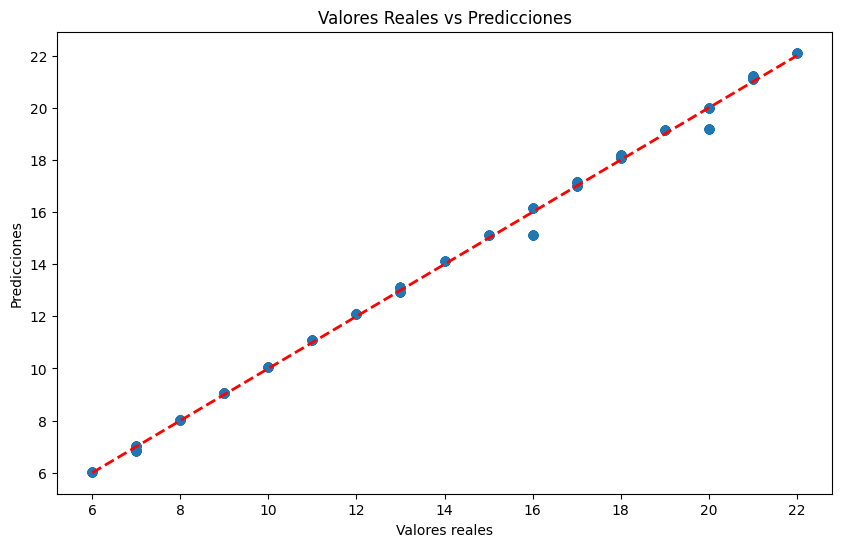

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()


Prediction error distribution:
prediction error; ideally, you want this distribution to be centred around zero and as narrow as possible.

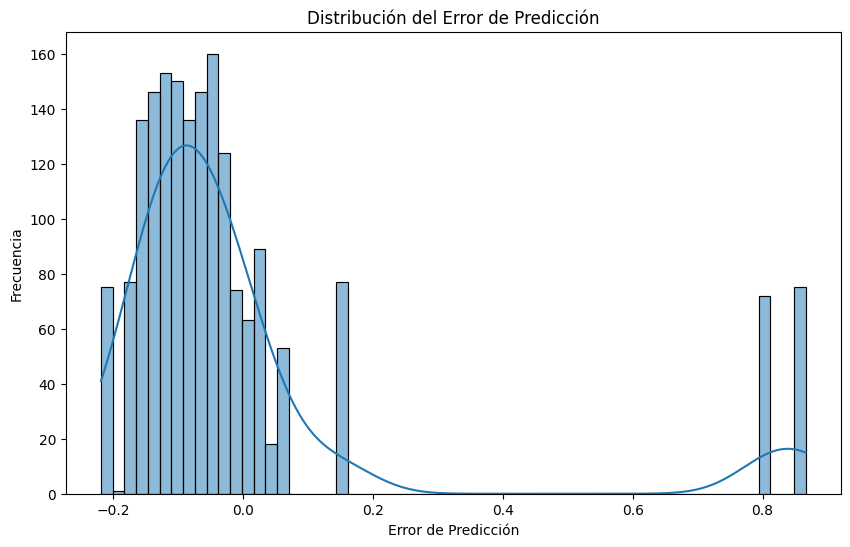

In [33]:
import seaborn as sns

errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución del Error de Predicción')
plt.show()


In [44]:
import requests

# Suponiendo que tienes una lista de direcciones de paradas
direcciones_paradas = [
    "Paradero Oriente #hunucma, Centro, 97000 Mérida, Yuc.",
    "C-65 x 68 Col. Centro 91, Parque Santiago, Centro, 97000 Mérida, Yuc.",
    "Sala de Juicios Orales 91, Parque Santiago, Centro, 97000 Mérida, Yuc.",
    "C-65 x 80 Col. Centro 91, Parque Santiago, Centro, 97000 Mérida, Yuc.",
    "Zoológico El Centenario 91, Parque Santiago, Centro, 97000 Mérida, Yuc.",
    "Hospital General Agustin O´Horan 91, Centro, 97000 Mérida, Yuc.",
    "Av Jacinto Canek 591, Centro, 97000 Mérida, Yuc.",
    "Tribunal Superior De Justicia Del Estado De Yucatán, Avenida Jacinto Canek Por 90 Y 96, Inalámbrica",
    "Interceramic Oficial, Av Jacinto Canek 570, Paseo de las Fuentes, 97225 Mérida, Yuc.",
    "Centro De Servicio Lth, Bojórquez, 97220 Mérida, Yuc.",
    "Atlántida real, Merida - Caucel 283, Miguel Hidalgo, 97220 Mérida, Yuc.",
    "Iberia Corrugados, Calle 59 -A # 813 Int. B X calle 50y 58 ., Nva. Hidalgo, 97220 Mérida, Yuc.",
    "Soriana Híper Canek, Av Jacinto Canek 277, Brisas del Poniente, 97248 Mérida, Yuc.",
    "Taquería Calvillo, C. 59 309, El Porvenir, 97226 Mérida, Yuc.",
    "REFACCIONES AUTOMOTRICES CANEK, C. 59ᴮ 395, El Porvenir, 97226 Mérida, Yuc.",
    "SUBESTACION PONIENTE DE ELECTRICIDAD, C. 59ᴮ S/N, El Porvenir, 97226 Mérida, Yuc.",
    "El Corralón, Por Calle 136 y 140 Av Merida, C. 59-A, El Porvenir, 97226 Mérida, Yuc.",
    "Parada Walmart Caucel, Merida - Caucel 500, 97302 Caucel, Yuc.",
    "La Gas - Caucel, Merida - Caucel 19032, Nora Quintana, 97314 Caucel, Yuc.",
    "AutoZone Refacciones, Calle 23 #22606, Gran Santa Fe, 97300 Mérida, Yuc.",
    "Merida - Caucel, 407",
    "Plaza Gran Santa Fe 91, 97314 Mérida, Yuc.",
    "Ucu",
    "Autobuses ORIENTE (ADO), 97350, C. 29 29, Centro, Hunucmá, Yuc."
]


# Tu clave API de MapQuest
API_KEY = 'Axh38BTtZGC9LrXTUySXP2d2jqANaAPT'

# Base URL para el servicio de geocodificación de MapQuest
base_url = "http://www.mapquestapi.com/geocoding/v1/address"

# Diccionario para almacenar las direcciones y sus coordenadas
coordenadas = {}

# Iterar sobre la lista de direcciones y obtener las coordenadas para cada una
for address in direcciones_paradas:
    # Crear la URL completa para la solicitud
    url = f"{base_url}?key={API_KEY}&location={address}, Merida, Yucatan, Mexico"

    # Hacer la solicitud a la API
    response = requests.get(url)

    # Verificar que la solicitud fue exitosa
    if response.status_code == 200:
        # Convertir la respuesta en JSON
        data = response.json()

        # Extraer la latitud y longitud
        if data['results'] and data['results'][0]['locations']:
            location = data['results'][0]['locations'][0]
            lat = location['latLng']['lat']
            lng = location['latLng']['lng']

            # Guardar las coordenadas en el diccionario
            coordenadas[address] = (lat, lng)
    else:
        print(f"Error al obtener las coordenadas para la dirección: {address}")

# Mostrar las coordenadas obtenidas
for address, (lat, lng) in coordenadas.items():
    print(f"Dirección: {address} -> Latitud: {lat}, Longitud: {lng}")



Dirección: Paradero Oriente #hunucma, Centro, 97000 Mérida, Yuc. -> Latitud: -33.51489, Longitud: -70.69061
Dirección: C-65 x 68 Col. Centro 91, Parque Santiago, Centro, 97000 Mérida, Yuc. -> Latitud: 20.96447, Longitud: -89.61975
Dirección: Sala de Juicios Orales 91, Parque Santiago, Centro, 97000 Mérida, Yuc. -> Latitud: 20.9474, Longitud: -89.62767
Dirección: C-65 x 80 Col. Centro 91, Parque Santiago, Centro, 97000 Mérida, Yuc. -> Latitud: 20.96448, Longitud: -89.64178
Dirección: Zoológico El Centenario 91, Parque Santiago, Centro, 97000 Mérida, Yuc. -> Latitud: 20.96938, Longitud: -89.63954
Dirección: Hospital General Agustin O´Horan 91, Centro, 97000 Mérida, Yuc. -> Latitud: 20.9746, Longitud: -89.64044
Dirección: Av Jacinto Canek 591, Centro, 97000 Mérida, Yuc. -> Latitud: 20.97602, Longitud: -89.64142
Dirección: Tribunal Superior De Justicia Del Estado De Yucatán, Avenida Jacinto Canek Por 90 Y 96, Inalámbrica -> Latitud: 20.97874, Longitud: -89.64446
Dirección: Interceramic Ofi

Ruta por via Ucu

In [34]:
import folium

# Diccionario de coordenadas de las paradas, reemplazado con los datos proporcionados
coordenadas_paradas = {
    "Casa (Paradero Oriente hunucma)": (20.96320283084818, -89.61714975263317),
    "C-65x68": (20.96614138895506, -89.62752935648959),
    "sala de juicios": (20.967234614194012, -89.63654867155198),
    "C-65x80": (20.96735376767743, -89.6366021789981),
    "zoo": (20.969849473680945, -89.64079999168798),
    "Horan": (20.97609975932392, -89.64133892354333),
    "Av Jacinto Canek 591, Centro":(20.986295455696652, -89.65775658518007),
    "Tribunal Superior De Justicia Del Estado De Yucatan": (20.977670819784485, -89.64395300158813),
    "Hogar Interceramic": (20.980253782072204, -89.64781211245382),
    "Atlantida real": (20.981393090436253, -89.65005532416887),
    "Iberia Corrugados": (20.98608780956613, -89.65768035870711),
    "Soriana Hiper Canek": (20.989154772187796, -89.6626312382123),
    "Taqueria Calvillo": (20.990807644476266, -89.66528395667223),
    "REFACCIONES AUTOMOTRICES CANEK": (20.99324445727384, -89.66903898331988),
    "SUBESTACION PONIENTE DE ELECTRICIDAD": (20.99359506505193, -89.6696528888458),
    "El Corralon": (20.994531539285344, -89.67133740713017),
    "Parada Walmart Caucel": (20.99650102211624, -89.67453973009474),
    "La Gas - Caucel": (20.99766960101714, -89.67592349859753),
    "AutoZone Refacciones": (21.000383882881184, -89.68067538250052),
    "Merida - Caucel, 407": (21.001931126971133, -89.68322842901301),
    "Plaza Gran Santa Fe 91": (21.00514367148165, -89.68830710327815),
    "Ucu": (21.03239665065798, -89.74652129030896),
    "Hora Llegada(Hunucma)": (21.01949, -89.88361),
}


# Crear un mapa centrado en la primera parada
primer_parada = list(coordenadas_paradas.values())[0]
mapa = folium.Map(location=primer_parada, zoom_start=12)

# Añadir marcadores para cada parada
for nombre_parada, (lat, lon) in coordenadas_paradas.items():
    folium.Marker([lat, lon], popup=nombre_parada).add_to(mapa)

# Añadir líneas entre las paradas para mostrar la ruta
puntos_ruta = list(coordenadas_paradas.values())
folium.PolyLine(puntos_ruta, color="blue", weight=2.5, opacity=1).add_to(mapa)

# Mostrar el mapa
mapa




In [43]:
import folium
import pandas as pd

# Asumiendo que 'data' es tu DataFrame y que 'coordenadas_paradas' es tu diccionario de coordenadas

# Filtrar el DataFrame para un día específico y un rango de tiempo
# Asegúrate de que tienes columnas de fecha y hora separadas o una columna de fecha y hora combinada
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['Hora Salida'] = pd.to_datetime(data['Hora Salida'], format='%H:%M:%S').dt.time

fecha_especifica = pd.to_datetime('1/1/2023')
hora_inicio = pd.to_datetime('05:00:00').time()
hora_fin = pd.to_datetime('21:00:00').time()

# Filtra por fecha y rango de hora
data_filtrado = data[(data['Fecha'] == fecha_especifica) &
                     (data['Hora Salida'] >= hora_inicio) &
                     (data['Hora Salida'] <= hora_fin)]

# Crear el mapa
mapa = folium.Map(location=primer_parada, zoom_start=12)

# Añadir marcadores para cada parada con las horas de llegada para ese día
for nombre_parada, (lat, lon) in coordenadas_paradas.items():
    # Inicializar una cadena de texto para el popup con las horas de llegada
    popup_text = f"{nombre_parada}<br>"

    # Filtrar las horas de llegada para el rango de tiempo y la parada específica
    horas_llegada = data_filtrado[nombre_parada]  # Reemplaza 'nombre_parada' por el nombre de la columna real
    horas_llegada = horas_llegada.dropna().astype(str)

    # Añadir las horas al texto del popup
    for hora in horas_llegada:
        popup_text += f"Hora de llegada: {hora}<br>"

    # Crear un marcador con el texto del popup
    folium.Marker(
        location=(lat, lon),
        popup=popup_text,
        icon=folium.Icon(color="blue")
    ).add_to(mapa)

# Añadir líneas entre las paradas para mostrar la ruta (opcional)
puntos_ruta = list(coordenadas_paradas.values())
folium.PolyLine(puntos_ruta, color="blue", weight=2.5, opacity=1).add_to(mapa)

# Mostrar el mapa
mapa.save('mapa_con_horarios.html')  # Guarda el mapa en un archivo HTML que puedes abrir en un navegador


mapa



# 6. Deployment
Presentation of the Interactive Map:

* Online Publication: The interactive map will be published on an accessible platform, such as a website or data portal, where stakeholders can consult the information.
Urban Mobility.
* Feedback and Continuous Improvement:

Feedback and Adjustments: Collect comments from users of the interactive map and use this information to make continuous improvements to the presentation and accuracy of the data.

# 7. Conclusion
Feasibility of Arrival Time Prediction: The developed model has shown that it is possible to predict bus arrival times with reasonable accuracy, which can be a useful tool for transport operators and passengers.

Importance of Accuracy in Public Transport: Accurate arrival times are critical to the reliability and efficiency of the public transport service, and can have a significant impact on user satisfaction.

##Future work
Improve Model Accuracy: Continue to refine predictive models with additional data, such as weather conditions, special events and changes in traffic patterns. This could help improve the accuracy of bus arrival predictions.

Real-Time Data Integration: Explore the possibility of integrating real-time data, such as GPS location of buses and traffic conditions, to make even more accurate and dynamic predictions.